In [54]:
import numpy as np
from numpy.linalg import solve, eigvals, det
from random import random
from matplotlib import pylab as plt

In [46]:
A = np.array([
    [0.7, -0.2, 0.3],
    [0.4,  1.3, 0.1],
    [0.2,  0.1, 1.1]
])
F = np.array([3, 1, 1])

In [48]:
def is_ok(a):
    return np.all(np.abs(eigvals(a)) < 1)

In [49]:
a = np.eye(len(A)) - A
f = F
is_ok(a)

True

In [50]:
def monte_carlo(a, f, m, N):
    x = []
    n = len(f)
    h = np.eye(n)
    pi = np.full((3,), 1 / n)
    p = np.full((3,3), 1 / n)
    Q = np.zeros((n, N+1))
    ksi = np.zeros((n,m))
    alpha = 0
    
    def prob_intervals(vector): 
        n = len(vector)
        result = []
        s = 0
        result.append(0)
        for i in range (1, n + 1):
            result.append(s + vector[i - 1])
            s = result[i]
        return result

    def get_state(alpha, intervals):
        for i in range(1, len(intervals)):
            if alpha < intervals[i]:
                return i - 1
            
    i = []
    for j in range(m):
        alpha = random()
        intervals = prob_intervals(pi)
        state = get_state(alpha, intervals)
        i.append(state)

        for k in range(1, N + 1):
            alpha = random()
            i.append(get_state(alpha, intervals))

        for o in range(n):
            Q[o][0] = h[o][i[0]] / pi[i[0]] if pi[i[0]] > 0 else 0

        for k in range(1, N + 1):
            for o in range(n):
                Q[o][k] = Q[o][k - 1] * a[i[k - 1]][i[k]] / p[i[k - 1]][i[k]] if p[i[k - 1]][i[k]] > 0 else 0

        for k in range(N + 1):
            for o in range(n):
                ksi[o][j] = ksi[o][j] + Q[o][k] * f[i[k]]
        i = []

    for _ in range(n):
        x.append(sum(ksi[_]) / m)
    print(x)
    return x

In [51]:
x_exact = solve(A, f)
x_exact

array([ 4.0513834 , -0.49407115,  0.2173913 ])

In [55]:
%%time
x = monte_carlo(a, f, 5000, 1000)
x

[4.022057263368946, -0.5011947321063386, 0.16586877458372157]
Wall time: 55.3 s


In [53]:
mse = np.mean((x - x_exact) ** 2)
mse

0.0025962265906487414

In [56]:
def plot(x, y, x_label):
    plt.plot(x, y, label='actual')
    plt.xscale('log')
    plt.xlabel(x_label)
    plt.ylabel('MSE')
    plt.legend()
    plt.show()

In [58]:
%%time
N_variations = [1000 * i for i in range(1, 8)]
m_variations = [1000 * i for i in range(1, 8)]

answers_m_fixed = [monte_carlo(a, f, 5000, 1000 * i) for i in range(1, 8)]
answers_N_fixed = [monte_carlo(a, f, 1000 * i, 1000) for i in range(1, 8)]

mse_m_fixed = [np.mean((i - x_exact) ** 2) for i in answers_m_fixed]
mse_N_fixed = [np.mean((i - x_exact) ** 2) for i in answers_N_fixed]

[4.022570980597372, -0.5099605972018737, 0.22820427536907423]
[4.056097865526896, -0.44353117941265047, 0.15789243896561964]
[4.102616408063204, -0.422030228304682, 0.18617325233895707]
[4.126508423473943, -0.5391303443121098, 0.16257921837505337]
[4.3051649443934625, -0.4057661023124774, 0.19845213858870178]
[4.08811434807952, -0.5061425322153651, 0.2063818154967858]
[4.053466599012406, -0.32618341056011957, 0.17950390887095147]
[4.331953190575631, -0.7399639236254545, 0.24300590032268557]
[4.143672406023603, -0.787502770241858, 0.1753504578051753]
[3.8473135948205073, -0.4573051329859899, 0.1477798779461838]
[4.008266016462051, -0.4229110101531046, 0.22395404704410665]
[4.058723159166082, -0.5349863115633583, 0.09769600351349404]
[3.9501215349688312, -0.48309145442814255, 0.20562989300619544]
[4.193265605189623, -0.6096428252884468, 0.21127989244308162]
Wall time: 32min 50s


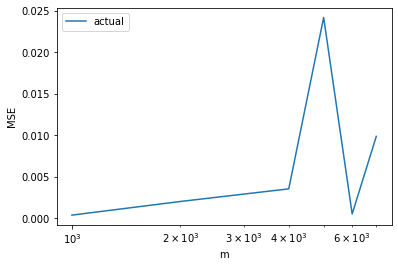

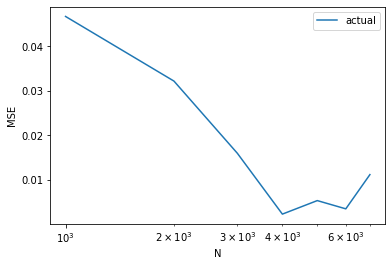

In [59]:
plot(N_variations, mse_m_fixed, "m")
plot(m_variations, mse_N_fixed, "N")